In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
plt.style.use('ggplot')

## 이미지 불러오기

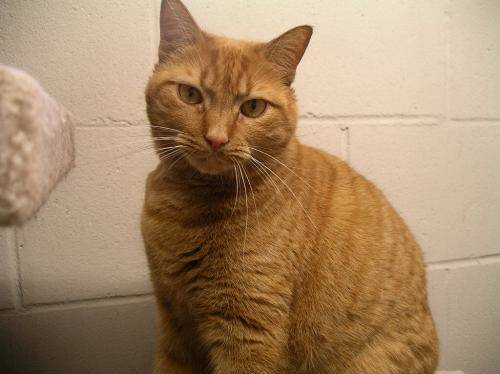

In [2]:
imgData = image.load_img('image/cat/cat1.jpg')
imgData

In [3]:
type(imgData)

PIL.JpegImagePlugin.JpegImageFile

## 정규화

In [4]:
dataGen = image.ImageDataGenerator(rescale=1./255)

## 이미지 디렉터리 가져오기

In [5]:
trainGen= dataGen.flow_from_directory('image',target_size=(98,98))

Found 20 images belonging to 2 classes.


In [6]:
type(trainGen)

keras.preprocessing.image.DirectoryIterator

## x,y훈련 데이터 나눔

In [8]:
x_train,y_train = trainGen.next()

In [9]:
x_train.shape , y_train.shape

((20, 98, 98, 3), (20, 2))

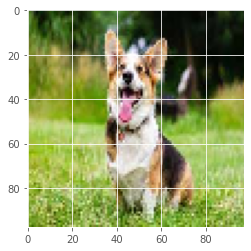

In [10]:
plt.imshow(x_train[0])

## 분류값 확인 0:고양이, 1:개

In [11]:
trainGen.class_indices

{'cat': 0, 'dog': 1}

## 모델링

In [12]:

model = Sequential()
model.add(Flatten(input_shape = (98,98,3)))
model.add(Dense(units=64,  activation='relu' )  )
model.add(Dense(units=32,  activation='relu' )  )
model.add(Dense(units=2,  activation='softmax' )  )

# model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.compile( loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
model.fit(x_train, y_train,epochs=50)
h = model.fit(x_train, y_train,epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 283ms/step - loss: 0.8013 - acc: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 8.8802 - acc: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 1.9743 - acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 1.4150 - acc: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 0.5267 - acc: 0.8000
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 0.3202 - acc: 0.9000
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 0.3775 - acc: 0.8500
Epoch 8/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2934 - acc: 0.9000
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 0.3089 - acc: 0.9000
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2360 - acc: 0.9500
Epoch 11/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2495 - acc: 0.

1/1 [==============================] - 0s 6ms/step - loss: 0.0060 - acc: 1.0000
Epoch 41/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0059 - acc: 1.0000
Epoch 42/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0058 - acc: 1.0000
Epoch 43/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0057 - acc: 1.0000
Epoch 44/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0057 - acc: 1.0000
Epoch 45/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0056 - acc: 1.0000
Epoch 46/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0055 - acc: 1.0000
Epoch 47/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0055 - acc: 1.0000
Epoch 48/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0054 - acc: 1.0000
Epoch 49/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0053 - acc: 1.0000
Epoch 50/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0053 - acc: 1.0000


## 테스트 데이터

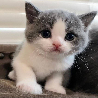

In [13]:
testImg = image.load_img('image/test.jpg',target_size=(98,98))
testImg

In [14]:
type(testImg)

PIL.Image.Image

In [15]:
imgArr = image.img_to_array(testImg) #  넘파이 배열로 만듦
imgArr = imgArr/255   #  스케일링

In [16]:
model.predict(imgArr.reshape(1,98,98,3)).argmax(axis=1)

array([1], dtype=int64)

In [17]:
import pickle
fp = open('catdog.history','wb')
pickle.dump(h.history,fp)
fp.close()

In [18]:
import shelve
sh = shelve.open('myhist')
sh['myh'] = h.history
sh.close()

# CNN

## 데이터 로드

In [19]:
from tensorflow.keras.datasets.mnist import load_data
mnistData = load_data()

##  훈련, 검증 나누기

In [20]:
(x_train,y_train) , (x_test, y_test) = mnistData

In [22]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:

from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D

#